In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
import keras as ker
import datetime
import numpy as np

In [40]:
sclr = MinMaxScaler(feature_range=(0, 1))


In [27]:
# import the file
df = pd.read_csv(r'pharmaceutical.csv',parse_dates=["SDate"],dayfirst=True)


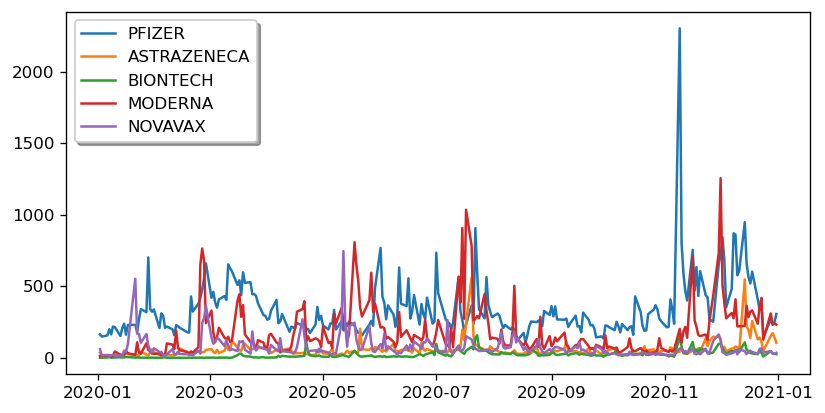

In [25]:
# Draw the volumes graph
plt.rcParams.update({'figure.figsize':(8,4), 'figure.dpi':120})
plt.plot(df['PFIZER_Volume']/100000, label='PFIZER')
plt.plot(df['ASTRAZENECA_Volume']/100000,label='ASTRAZENECA')
plt.plot(df['BIONTECH_Volume']/100000,label='BIONTECH')
plt.plot(df['MODERNA_Volume']/100000,label='MODERNA')
plt.plot(df['NOVAVAX_Volume']/100000,label='NOVAVAX')
legend = plt.legend(loc='upper left', shadow=True)
plt.title='Stock Volume'
plt.title='Stock Volume in 100,000s'
plt.show()

In [45]:
# create a new datafile
df_adjusted=df[['SDate','PFIZER_Adj Close','ASTRAZENECA_Adj Close','BIONTECH_Adj Close','MODERNA_Adj Close','NOVAVAX_Adj Close']]
df_adjusted=df_adjusted.sort_index(ascending=True, axis=0)
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})



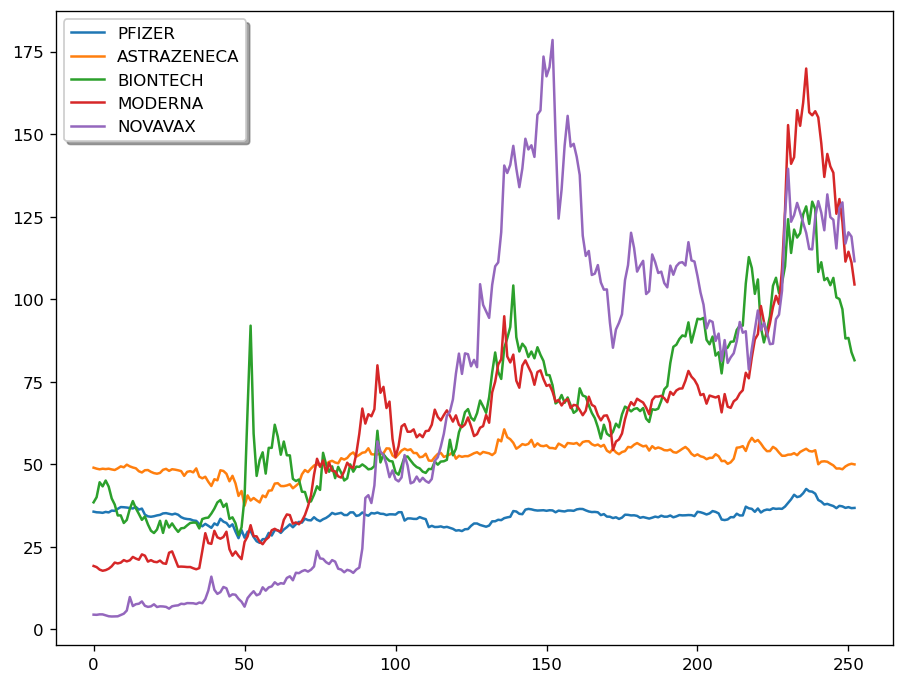

In [29]:
# plot the price movement graph
plt.plot(df['PFIZER_Adj Close'], label='PFIZER')
plt.plot(df['ASTRAZENECA_Adj Close'],label='ASTRAZENECA')
plt.plot(df['BIONTECH_Adj Close'],label='BIONTECH')
plt.plot(df['MODERNA_Adj Close'],label='MODERNA')
plt.plot(df['NOVAVAX_Adj Close'],label='NOVAVAX')
legend = plt.legend(loc='upper left', shadow=True)
plt.title='Adj Close Price history'

In [34]:
# Generate descriptive statistics
df_adjusted=df[['PFIZER_Adj Close','ASTRAZENECA_Adj Close','BIONTECH_Adj Close','MODERNA_Adj Close','NOVAVAX_Adj Close']]
df_adjusted.describe()


,PFIZER_Adj Close,ASTRAZENECA_Adj Close,BIONTECH_Adj Close,MODERNA_Adj Close,NOVAVAX_Adj Close
count,253.000000,253.000000,253.000000,253.000000,253.000000
mean,34.332977,51.464908,64.953952,62.504150,69.301107
std,2.654598,4.309371,25.048632,33.486319,50.240869
min,26.234787,37.490292,28.549999,17.780001,3.930000
25%,33.122684,48.700348,45.830002,31.860001,14.900000
50%,34.634327,52.688789,62.000000,64.750000,81.330002
75%,35.923424,54.720001,85.250000,73.000000,111.150001
max,42.560001,60.615417,129.539993,169.860001,178.509995


Epoch 1/40
175/175 - 1s - loss: 0.0133
Epoch 2/40
175/175 - 1s - loss: 0.0059
Epoch 3/40
175/175 - 1s - loss: 0.0050
Epoch 4/40
175/175 - 1s - loss: 0.0035
Epoch 5/40
175/175 - 1s - loss: 0.0040
Epoch 6/40
175/175 - 1s - loss: 0.0040
Epoch 7/40
175/175 - 1s - loss: 0.0052
Epoch 8/40
175/175 - 1s - loss: 0.0032
Epoch 9/40
175/175 - 1s - loss: 0.0036
Epoch 10/40
175/175 - 1s - loss: 0.0027
Epoch 11/40
175/175 - 1s - loss: 0.0028
Epoch 12/40
175/175 - 1s - loss: 0.0025
Epoch 13/40
175/175 - 1s - loss: 0.0024
Epoch 14/40
175/175 - 1s - loss: 0.0025
Epoch 15/40
175/175 - 1s - loss: 0.0026
Epoch 16/40
175/175 - 1s - loss: 0.0020
Epoch 17/40
175/175 - 1s - loss: 0.0019
Epoch 18/40
175/175 - 1s - loss: 0.0018
Epoch 19/40
175/175 - 1s - loss: 0.0020
Epoch 20/40
175/175 - 1s - loss: 0.0022
Epoch 21/40
175/175 - 1s - loss: 0.0022
Epoch 22/40
175/175 - 1s - loss: 0.0017
Epoch 23/40
175/175 - 1s - loss: 0.0019
Epoch 24/40
175/175 - 1s - loss: 0.0014
Epoch 25/40
175/175 - 1s - loss: 0.0014
Epoch 26/

<ipython-input-59-4a7e21faf877>:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = future_price


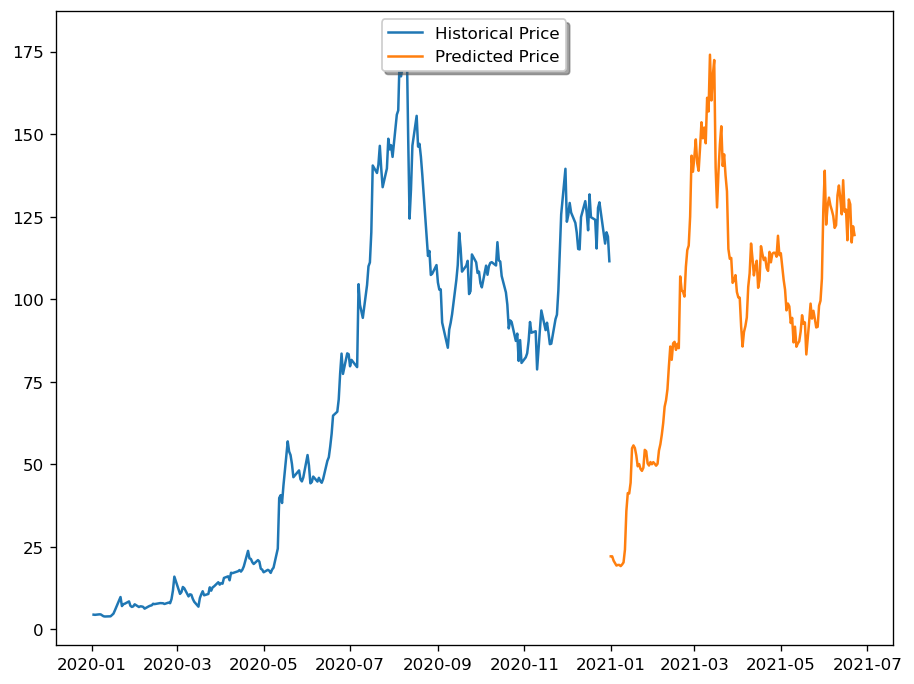

In [59]:
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date','Close'])
new_data2 = pd.DataFrame(index=range(0,len(df)),columns=['Date','Close'])
# Forecast for NOVAVAX
for i in range(0,len(df_adjusted)):
    new_data['Date'][i] = df_adjusted['SDate'][i]
    new_data['Close'][i] = df_adjusted['NOVAVAX_Adj Close'][i]
    new_data2['Date'][i] = df_adjusted['SDate'][i]
    new_data2['Close'][i] = df_adjusted['NOVAVAX_Adj Close'][i]
new_data.index = new_data.Date
new_data1=new_data['Date'][len(new_data)-1]
new_data.drop('Date', axis=1, inplace=True)

time_change = datetime.timedelta(days=1)
#creating train and test sets
dataset = new_data.values

train = dataset[0:200,:]
valid = dataset[200:,:]

#converting dataset into x_train and y_train
sclr = MinMaxScaler(feature_range=(0, 1))
scaled_data = sclr.fit_transform(dataset)

x_train, y_train = [], []
for i in range(25,len(train)):
    x_train.append(scaled_data[i-25:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=40, batch_size=1, verbose=2)
#predicting 53 values, using past 25 from the train data
inputs = new_data[len(new_data) - len(valid) - 25:].values
inputs = inputs.reshape(-1,1)
inputs  = sclr.transform(inputs)

X_test = []
for i in range(25,inputs.shape[0]):
     X_test.append(inputs[i-25:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = sclr.inverse_transform(closing_price)

#predicting next one month, using past 25 from the train data
future = new_data[len(new_data) - len(valid) -120 - 25:].values

future = future.reshape(-1,1)
future  = sclr.transform(future)

X_future = []
print(future.shape[0])
for i in range(25,future.shape[0]):

    X_future.append(future[i-25:i,0])
    new_data1=new_data1 + time_change
    new_row = {'Date': new_data1, 'Close': 0}
    new_data2=new_data2.append(new_row, ignore_index=True)
new_data2.index = new_data2.Date
new_data2.drop('Date', axis=1, inplace=True)

X_future = np.array(X_future)

X_future = np.reshape(X_future, (X_future.shape[0],X_future.shape[1],1))
future_price = model.predict(X_future)
future_price = sclr.inverse_transform(future_price)


rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
print(rms)

train = new_data2[:253]
valid = new_data2[253:]

valid['Predictions'] = future_price
plt.plot(train['Close'],label='Historical Price')
plt.plot(valid['Predictions'],label='Predicted Price')

legend = plt.legend(loc='upper center', shadow=True)
# plt.title('NOVAVAX STOCK PRICES FORECAST')
# plt.xlabel('Dates')
# plt.ylabel('Stock Adjusted Closing Price')
plt.show()

Epoch 1/40
175/175 - 1s - loss: 0.0123
Epoch 2/40
175/175 - 1s - loss: 0.0048
Epoch 3/40
175/175 - 1s - loss: 0.0046
Epoch 4/40
175/175 - 1s - loss: 0.0042
Epoch 5/40
175/175 - 1s - loss: 0.0034
Epoch 6/40
175/175 - 1s - loss: 0.0032
Epoch 7/40
175/175 - 1s - loss: 0.0033
Epoch 8/40
175/175 - 1s - loss: 0.0033
Epoch 9/40
175/175 - 1s - loss: 0.0029
Epoch 10/40
175/175 - 1s - loss: 0.0030
Epoch 11/40
175/175 - 1s - loss: 0.0028
Epoch 12/40
175/175 - 1s - loss: 0.0025
Epoch 13/40
175/175 - 1s - loss: 0.0025
Epoch 14/40
175/175 - 1s - loss: 0.0026
Epoch 15/40
175/175 - 1s - loss: 0.0025
Epoch 16/40
175/175 - 1s - loss: 0.0025
Epoch 17/40
175/175 - 1s - loss: 0.0024
Epoch 18/40
175/175 - 1s - loss: 0.0025
Epoch 19/40
175/175 - 1s - loss: 0.0025
Epoch 20/40
175/175 - 1s - loss: 0.0026
Epoch 21/40
175/175 - 1s - loss: 0.0021
Epoch 22/40
175/175 - 1s - loss: 0.0021
Epoch 23/40
175/175 - 1s - loss: 0.0025
Epoch 24/40
175/175 - 1s - loss: 0.0026
Epoch 25/40
175/175 - 1s - loss: 0.0023
Epoch 26/

<ipython-input-58-44b6f3d5b02c>:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = future_price


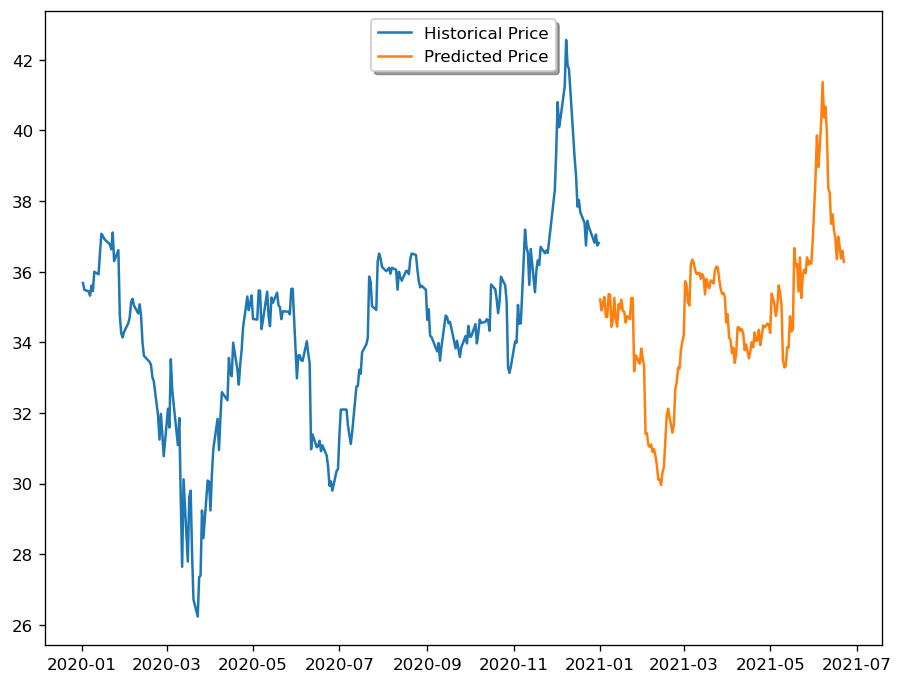

In [58]:
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date','Close'])
new_data2 = pd.DataFrame(index=range(0,len(df)),columns=['Date','Close'])
# Forecast for NOVAVAX
for i in range(0,len(df_adjusted)):
    new_data['Date'][i] = df_adjusted['SDate'][i]
    new_data['Close'][i] = df_adjusted['PFIZER_Adj Close'][i]
    new_data2['Date'][i] = df_adjusted['SDate'][i]
    new_data2['Close'][i] = df_adjusted['PFIZER_Adj Close'][i]
new_data.index = new_data.Date
new_data1=new_data['Date'][len(new_data)-1]
new_data.drop('Date', axis=1, inplace=True)

time_change = datetime.timedelta(days=1)
#creating train and test sets
dataset = new_data.values

train = dataset[0:200,:]
valid = dataset[200:,:]

#converting dataset into x_train and y_train
sclr = MinMaxScaler(feature_range=(0, 1))
scaled_data = sclr.fit_transform(dataset)

x_train, y_train = [], []
for i in range(25,len(train)):
    x_train.append(scaled_data[i-25:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=40, batch_size=1, verbose=2)
#predicting 53 values, using past 25 from the train data
inputs = new_data[len(new_data) - len(valid) - 25:].values
inputs = inputs.reshape(-1,1)
inputs  = sclr.transform(inputs)

X_test = []
for i in range(25,inputs.shape[0]):
     X_test.append(inputs[i-25:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = sclr.inverse_transform(closing_price)

#predicting next one month, using past 25 from the train data
future = new_data[len(new_data) - len(valid) -120 - 25:].values

future = future.reshape(-1,1)
future  = sclr.transform(future)

X_future = []
print(future.shape[0])
for i in range(25,future.shape[0]):

    X_future.append(future[i-25:i,0])
    new_data1=new_data1 + time_change
    new_row = {'Date': new_data1, 'Close': 0}
    new_data2=new_data2.append(new_row, ignore_index=True)
new_data2.index = new_data2.Date
new_data2.drop('Date', axis=1, inplace=True)

X_future = np.array(X_future)

X_future = np.reshape(X_future, (X_future.shape[0],X_future.shape[1],1))
future_price = model.predict(X_future)
future_price = sclr.inverse_transform(future_price)


rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
print(rms)

train = new_data2[:253]
valid = new_data2[253:]

valid['Predictions'] = future_price
plt.plot(train['Close'],label='Historical Price')
plt.plot(valid['Predictions'],label='Predicted Price')

legend = plt.legend(loc='upper center', shadow=True)
# plt.title('NOVAVAX STOCK PRICES FORECAST')
# plt.xlabel('Dates')
# plt.ylabel('Stock Adjusted Closing Price')
plt.show()

Epoch 1/40
175/175 - 1s - loss: 0.0195
Epoch 2/40
175/175 - 1s - loss: 0.0083
Epoch 3/40
175/175 - 1s - loss: 0.0074
Epoch 4/40
175/175 - 1s - loss: 0.0063
Epoch 5/40
175/175 - 1s - loss: 0.0059
Epoch 6/40
175/175 - 1s - loss: 0.0056
Epoch 7/40
175/175 - 1s - loss: 0.0054
Epoch 8/40
175/175 - 1s - loss: 0.0045
Epoch 9/40
175/175 - 1s - loss: 0.0046
Epoch 10/40
175/175 - 1s - loss: 0.0040
Epoch 11/40
175/175 - 1s - loss: 0.0037
Epoch 12/40
175/175 - 1s - loss: 0.0037
Epoch 13/40
175/175 - 1s - loss: 0.0036
Epoch 14/40
175/175 - 1s - loss: 0.0042
Epoch 15/40
175/175 - 1s - loss: 0.0036
Epoch 16/40
175/175 - 1s - loss: 0.0032
Epoch 17/40
175/175 - 1s - loss: 0.0034
Epoch 18/40
175/175 - 1s - loss: 0.0029
Epoch 19/40
175/175 - 1s - loss: 0.0029
Epoch 20/40
175/175 - 1s - loss: 0.0034
Epoch 21/40
175/175 - 1s - loss: 0.0031
Epoch 22/40
175/175 - 1s - loss: 0.0029
Epoch 23/40
175/175 - 1s - loss: 0.0032
Epoch 24/40
175/175 - 1s - loss: 0.0027
Epoch 25/40
175/175 - 1s - loss: 0.0030
Epoch 26/

<ipython-input-55-ccb09ae41228>:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = future_price


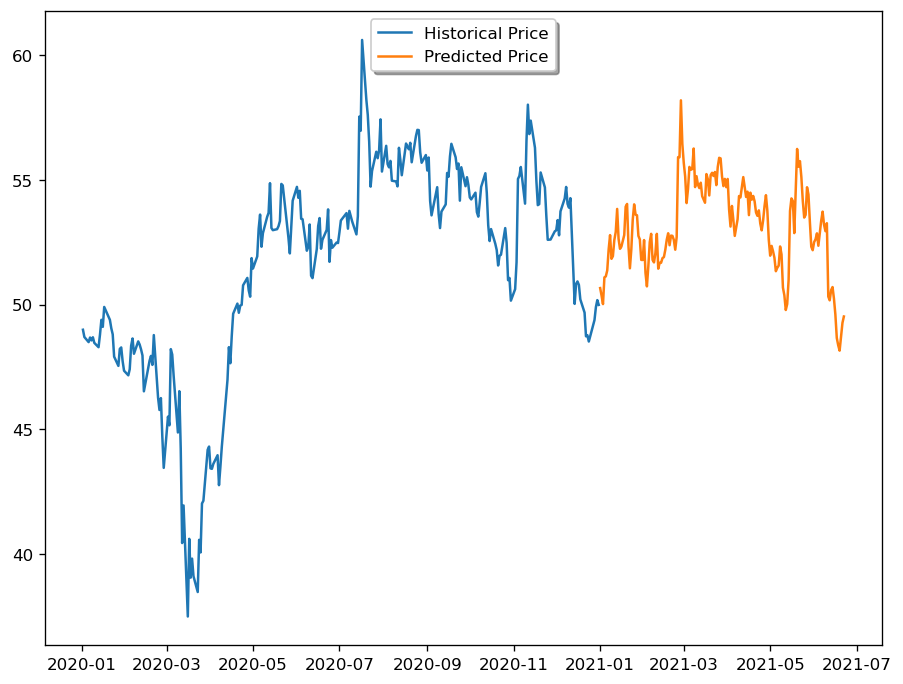

In [55]:
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date','Close'])
new_data2 = pd.DataFrame(index=range(0,len(df)),columns=['Date','Close'])
# Forecast for NOVAVAX
for i in range(0,len(df_adjusted)):
    new_data['Date'][i] = df_adjusted['SDate'][i]
    new_data['Close'][i] = df_adjusted['ASTRAZENECA_Adj Close'][i]
    new_data2['Date'][i] = df_adjusted['SDate'][i]
    new_data2['Close'][i] = df_adjusted['ASTRAZENECA_Adj Close'][i]
new_data.index = new_data.Date
new_data1=new_data['Date'][len(new_data)-1]
new_data.drop('Date', axis=1, inplace=True)

time_change = datetime.timedelta(days=1)
#creating train and test sets
dataset = new_data.values

train = dataset[0:200,:]
valid = dataset[200:,:]

#converting dataset into x_train and y_train
sclr = MinMaxScaler(feature_range=(0, 1))
scaled_data = sclr.fit_transform(dataset)

x_train, y_train = [], []
for i in range(25,len(train)):
    x_train.append(scaled_data[i-25:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=40, batch_size=1, verbose=2)
#predicting 53 values, using past 25 from the train data
inputs = new_data[len(new_data) - len(valid) - 25:].values
inputs = inputs.reshape(-1,1)
inputs  = sclr.transform(inputs)

X_test = []
for i in range(25,inputs.shape[0]):
     X_test.append(inputs[i-25:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = sclr.inverse_transform(closing_price)

#predicting next one month, using past 25 from the train data
future = new_data[len(new_data) - len(valid) -120 - 25:].values

future = future.reshape(-1,1)
future  = sclr.transform(future)

X_future = []
print(future.shape[0])
for i in range(25,future.shape[0]):

    X_future.append(future[i-25:i,0])
    new_data1=new_data1 + time_change
    new_row = {'Date': new_data1, 'Close': 0}
    new_data2=new_data2.append(new_row, ignore_index=True)
new_data2.index = new_data2.Date
new_data2.drop('Date', axis=1, inplace=True)

X_future = np.array(X_future)

X_future = np.reshape(X_future, (X_future.shape[0],X_future.shape[1],1))
future_price = model.predict(X_future)
future_price = sclr.inverse_transform(future_price)


rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
print(rms)

train = new_data2[:253]
valid = new_data2[253:]

valid['Predictions'] = future_price
plt.plot(train['Close'],label='Historical Price')
plt.plot(valid['Predictions'],label='Predicted Price')

legend = plt.legend(loc='upper center', shadow=True)
# plt.title('NOVAVAX STOCK PRICES FORECAST')
# plt.xlabel('Dates')
# plt.ylabel('Stock Adjusted Closing Price')
plt.show()

In [ ]:
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date','Close'])
new_data2 = pd.DataFrame(index=range(0,len(df)),columns=['Date','Close'])
# Forecast for NOVAVAX
for i in range(0,len(df_adjusted)):
    new_data['Date'][i] = df_adjusted['SDate'][i]
    new_data['Close'][i] = df_adjusted['BIONTECH_Adj Close'][i]
    new_data2['Date'][i] = df_adjusted['SDate'][i]
    new_data2['Close'][i] = df_adjusted['BIONTECH_Adj Close'][i]
new_data.index = new_data.Date
new_data1=new_data['Date'][len(new_data)-1]
new_data.drop('Date', axis=1, inplace=True)

time_change = datetime.timedelta(days=1)
#creating train and test sets
dataset = new_data.values

train = dataset[0:200,:]
valid = dataset[200:,:]

#converting dataset into x_train and y_train
sclr = MinMaxScaler(feature_range=(0, 1))
scaled_data = sclr.fit_transform(dataset)

x_train, y_train = [], []
for i in range(25,len(train)):
    x_train.append(scaled_data[i-25:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=40, batch_size=1, verbose=2)
#predicting 53 values, using past 25 from the train data
inputs = new_data[len(new_data) - len(valid) - 25:].values
inputs = inputs.reshape(-1,1)
inputs  = sclr.transform(inputs)

X_test = []
for i in range(25,inputs.shape[0]):
     X_test.append(inputs[i-25:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = sclr.inverse_transform(closing_price)

#predicting next one month, using past 25 from the train data
future = new_data[len(new_data) - len(valid) -120 - 25:].values

future = future.reshape(-1,1)
future  = sclr.transform(future)

X_future = []
print(future.shape[0])
for i in range(25,future.shape[0]):

    X_future.append(future[i-25:i,0])
    new_data1=new_data1 + time_change
    new_row = {'Date': new_data1, 'Close': 0}
    new_data2=new_data2.append(new_row, ignore_index=True)
new_data2.index = new_data2.Date
new_data2.drop('Date', axis=1, inplace=True)

X_future = np.array(X_future)

X_future = np.reshape(X_future, (X_future.shape[0],X_future.shape[1],1))
future_price = model.predict(X_future)
future_price = sclr.inverse_transform(future_price)


rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
print(rms)

train = new_data2[:253]
valid = new_data2[253:]

valid['Predictions'] = future_price
plt.plot(train['Close'],label='Historical Price')
plt.plot(valid['Predictions'],label='Predicted Price')

legend = plt.legend(loc='upper center', shadow=True)
# plt.title('NOVAVAX STOCK PRICES FORECAST')
# plt.xlabel('Dates')
# plt.ylabel('Stock Adjusted Closing Price')
plt.show()

Epoch 1/40
175/175 - 1s - loss: 0.0039
Epoch 2/40
175/175 - 1s - loss: 0.0019
Epoch 3/40
175/175 - 1s - loss: 0.0019
Epoch 4/40
175/175 - 1s - loss: 0.0016
Epoch 5/40
175/175 - 1s - loss: 0.0013
Epoch 6/40
175/175 - 1s - loss: 0.0013
Epoch 7/40
175/175 - 1s - loss: 0.0013
Epoch 8/40
175/175 - 1s - loss: 0.0011
Epoch 9/40
175/175 - 1s - loss: 0.0011
Epoch 10/40
175/175 - 1s - loss: 8.2414e-04
Epoch 11/40
175/175 - 1s - loss: 9.0262e-04
Epoch 12/40
175/175 - 1s - loss: 8.5608e-04
Epoch 13/40
175/175 - 1s - loss: 8.1608e-04
Epoch 14/40
175/175 - 1s - loss: 7.9863e-04
Epoch 15/40
175/175 - 1s - loss: 7.0979e-04
Epoch 16/40
175/175 - 1s - loss: 7.5229e-04
Epoch 17/40
175/175 - 1s - loss: 7.8777e-04
Epoch 18/40
175/175 - 1s - loss: 7.0385e-04
Epoch 19/40
175/175 - 1s - loss: 7.9033e-04
Epoch 20/40
175/175 - 1s - loss: 7.2057e-04
Epoch 21/40
175/175 - 1s - loss: 6.8453e-04
Epoch 22/40
175/175 - 1s - loss: 6.7166e-04
Epoch 23/40
175/175 - 1s - loss: 6.4429e-04
Epoch 24/40
175/175 - 1s - loss: 

<ipython-input-54-fc595a063a01>:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = future_price


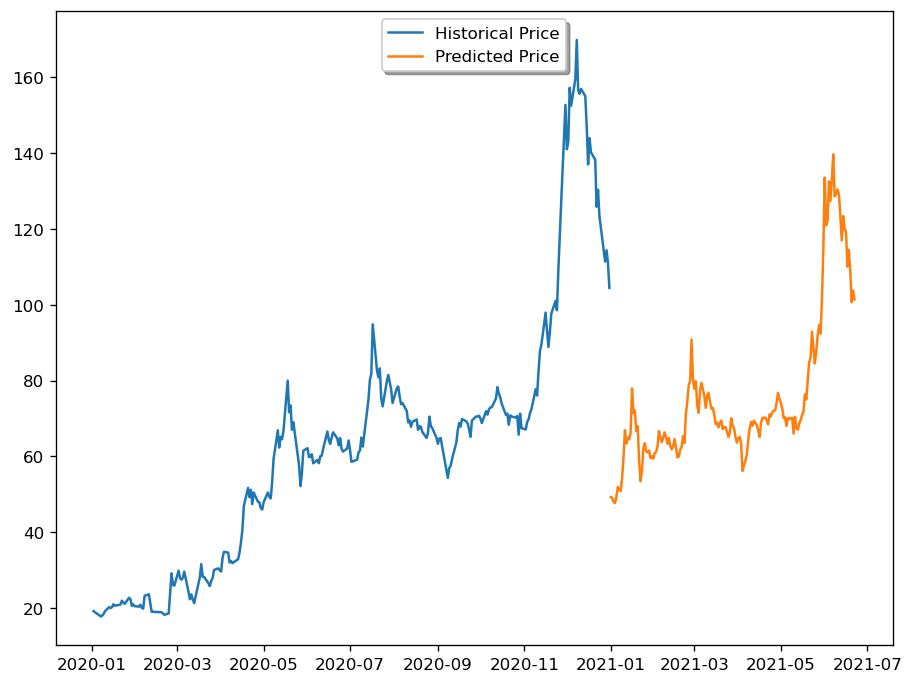

In [54]:
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date','Close'])
new_data2 = pd.DataFrame(index=range(0,len(df)),columns=['Date','Close'])
# Forecast for NOVAVAX
for i in range(0,len(df_adjusted)):
    new_data['Date'][i] = df_adjusted['SDate'][i]
    new_data['Close'][i] = df_adjusted['MODERNA_Adj Close'][i]
    new_data2['Date'][i] = df_adjusted['SDate'][i]
    new_data2['Close'][i] = df_adjusted['MODERNA_Adj Close'][i]
new_data.index = new_data.Date
new_data1=new_data['Date'][len(new_data)-1]
new_data.drop('Date', axis=1, inplace=True)

time_change = datetime.timedelta(days=1)
#creating train and test sets
dataset = new_data.values

train = dataset[0:200,:]
valid = dataset[200:,:]

#converting dataset into x_train and y_train
sclr = MinMaxScaler(feature_range=(0, 1))
scaled_data = sclr.fit_transform(dataset)

x_train, y_train = [], []
for i in range(25,len(train)):
    x_train.append(scaled_data[i-25:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=40, batch_size=1, verbose=2)
#predicting 53 values, using past 25 from the train data
inputs = new_data[len(new_data) - len(valid) - 25:].values
inputs = inputs.reshape(-1,1)
inputs  = sclr.transform(inputs)

X_test = []
for i in range(25,inputs.shape[0]):
     X_test.append(inputs[i-25:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = sclr.inverse_transform(closing_price)

#predicting next one month, using past 25 from the train data
future = new_data[len(new_data) - len(valid) -120 - 25:].values

future = future.reshape(-1,1)
future  = sclr.transform(future)

X_future = []
print(future.shape[0])
for i in range(25,future.shape[0]):

    X_future.append(future[i-25:i,0])
    new_data1=new_data1 + time_change
    new_row = {'Date': new_data1, 'Close': 0}
    new_data2=new_data2.append(new_row, ignore_index=True)
new_data2.index = new_data2.Date
new_data2.drop('Date', axis=1, inplace=True)

X_future = np.array(X_future)

X_future = np.reshape(X_future, (X_future.shape[0],X_future.shape[1],1))
future_price = model.predict(X_future)
future_price = sclr.inverse_transform(future_price)


rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
print(rms)

train = new_data2[:253]
valid = new_data2[253:]

valid['Predictions'] = future_price
plt.plot(train['Close'],label='Historical Price')
plt.plot(valid['Predictions'],label='Predicted Price')

legend = plt.legend(loc='upper center', shadow=True)
# plt.title('NOVAVAX STOCK PRICES FORECAST')
# plt.xlabel('Dates')
# plt.ylabel('Stock Adjusted Closing Price')
plt.show()